**import thư viện**

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from google.colab.patches import cv2_imshow
from math import hypot

In [2]:
!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

--2020-01-08 14:05:30--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2020-01-08 14:05:31--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   244MB/s    in 0.4s    

2020-01-08 14:05:31 (244 MB/s) 

**Lọc mụn**

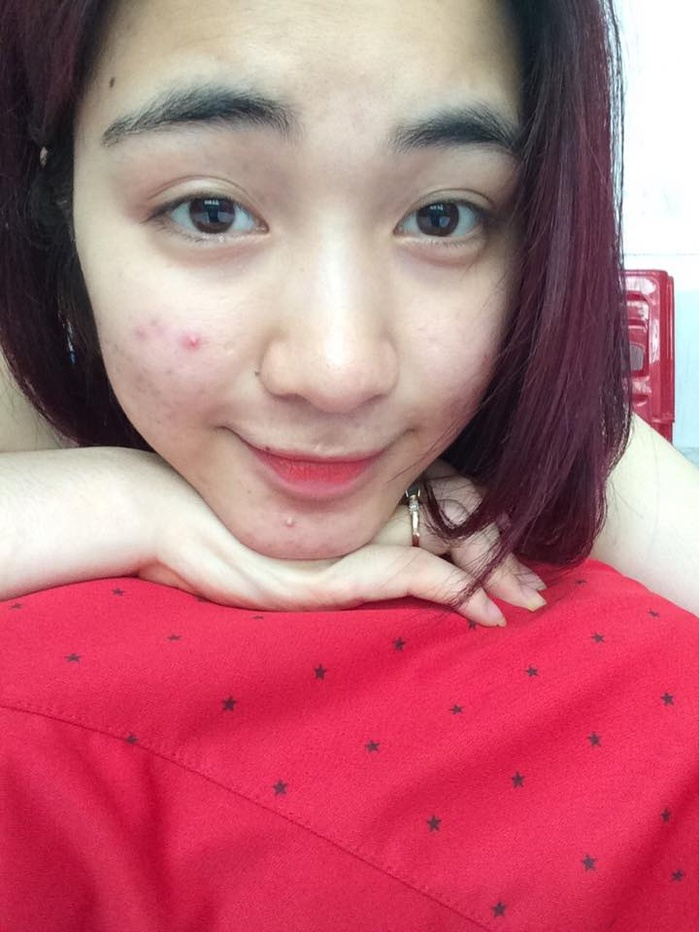

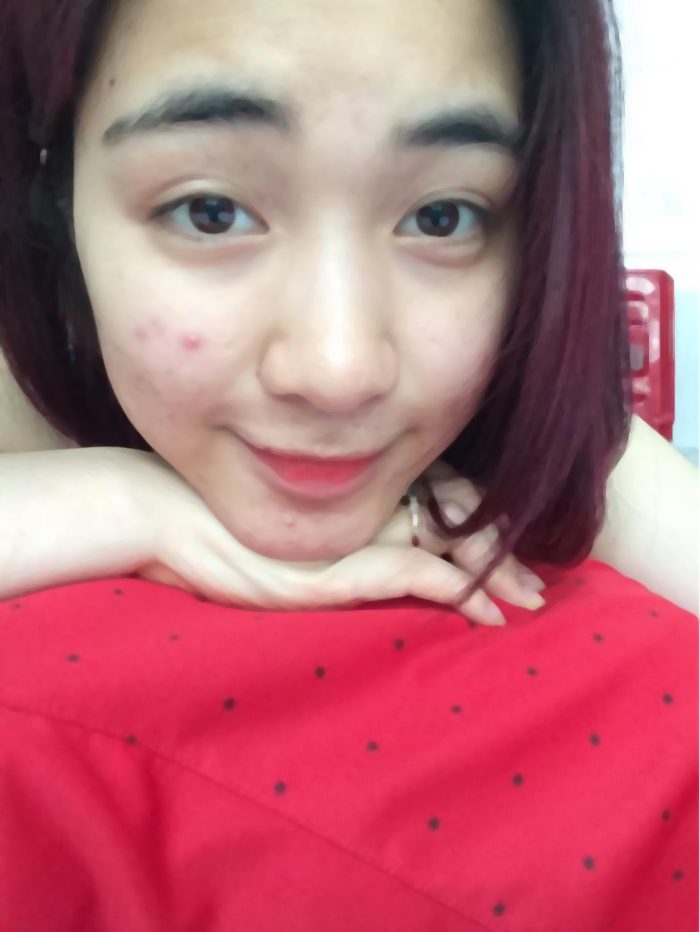

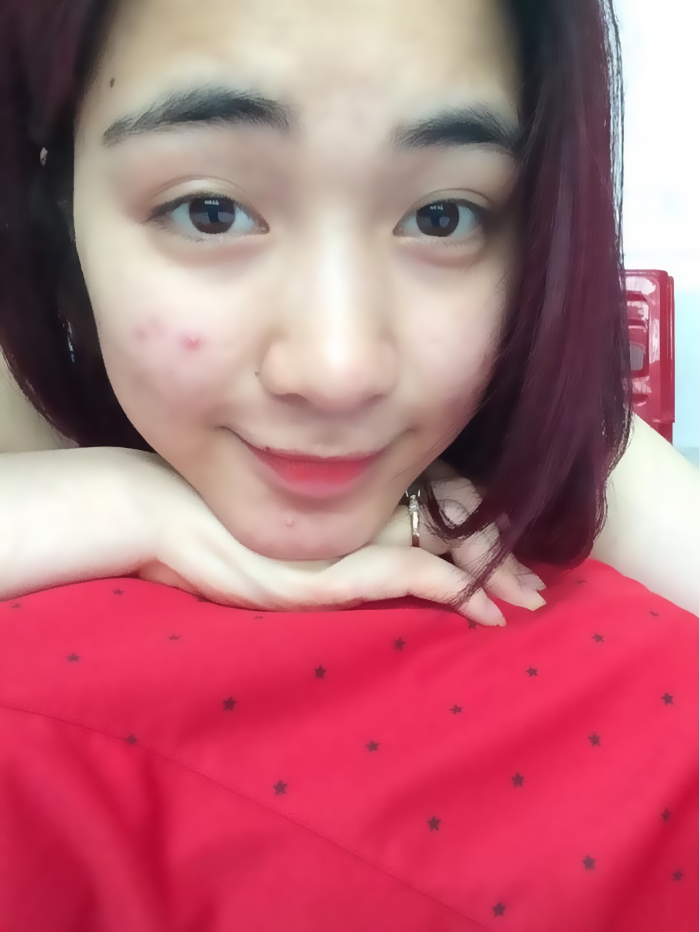

In [8]:
img = cv2.imread('mun.jpg')

median = cv2.medianBlur(img,7)
bilateral = cv2.bilateralFilter(img, 15, 51, 51) 
cv2_imshow(input)
cv2_imshow(median)
cv2_imshow(bilateral)




**Đeo mặt nạ**

255


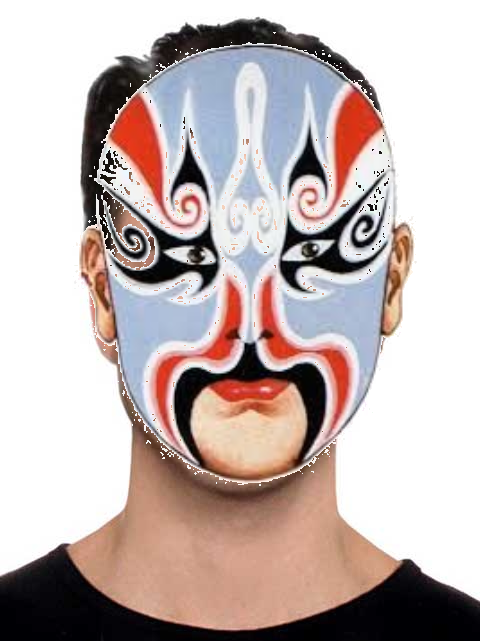

-1

In [0]:
nose_image = cv2.imread("matna.jpg")
frame=cv2.imread("nguoi3.jpg")
rows, cols, _ = frame.shape
nose_mask = np.zeros((rows, cols), np.uint8)
# Loading Face detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

frame = cv2.flip(frame, 1)
nose_mask.fill(0)
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(frame)
for face in faces:
    landmarks = predictor(gray_frame, face)
    # xác định landmark số 27,0,16
    #top_nose = (landmarks.part(19).x, landmarks.part(19).y)
    center_nose = (landmarks.part(27).x, landmarks.part(27).y)
    left_nose = (landmarks.part(0).x, landmarks.part(0).y)
    right_nose = (landmarks.part(16).x, landmarks.part(16).y)
    #tính kích thươc vùng mặt để ghép mặt nạ
    # hybot() là hàm tính theo công thức sqrt(x*x+y*y)
    nose_width = int(hypot(left_nose[0] - right_nose[0],
                           left_nose[1] - right_nose[1]) * 1.4)
    nose_height = int(nose_width * 1.3)



    top_left = (int(center_nose[0] - nose_width / 2),
                int(center_nose[1] - nose_height / 2))
    bottom_right = (int(center_nose[0] + nose_width / 2),
                    int(center_nose[1] + nose_height / 2))

#tính góc
    a = np.array([landmarks.part(27).x, landmarks.part(27).y])
    b = np.array([landmarks.part(8).x, landmarks.part(8).y])
    c = np.array([landmarks.part(27).x, 0])
    #print(a, b, c)
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    if (landmarks.part(8).x >= landmarks.part(27).x):
        q = np.arccos(cosine_angle) * 100
    else:
        q = 360 - np.arccos(cosine_angle) * 100

    num_rows, num_cols = nose_image.shape[:2]



    # resize và chuyển mặt nạ về ảnh xám
    nose_pig = cv2.resize(nose_image, (nose_width, nose_height))
    nose_pig_gray = cv2.cvtColor(nose_pig, cv2.COLOR_BGR2GRAY)



    # chuyển về ảnh nhị phân và đảo bit để lấy phần còn lại của mặt nạ( bỏ phần nền)
    _, nose_mask = cv2.threshold(nose_pig_gray, 245, 255, cv2.THRESH_BINARY_INV)
    mask_inv = cv2.bitwise_not(nose_mask)

# tính toán góc xoay
    rotation_matrix = cv2.getRotationMatrix2D((num_cols / 2, num_rows / 2), q, 0.9)
    nose_image = cv2.warpAffine(mask_inv, rotation_matrix, (num_cols, num_rows))


    print(mask_inv[0, 0])
    nose_area = frame[top_left[1]: top_left[1] + nose_height,
                top_left[0]: top_left[0] + nose_width]

    # vì đang là ảnh nhị phân=> and với ảnh mặt nạ ban đầu( đã resize) để lấy ảnh màu gốc của nó

    masked_face = cv2.bitwise_and(nose_pig,nose_pig, mask=nose_mask)

    # bôi đen( khoanh vùng) cái vị trí để đặt mặt nạ trong khuôn mặt
    nose_area_no_nose=cv2.bitwise_and(nose_area, nose_area,mask=mask_inv)
    # đặt mặt nạ vô đó

    final_nose=cv2.add(masked_face, nose_area_no_nose)
    frame[top_left[1]: top_left[1] + nose_height,
    top_left[0]: top_left[0] + nose_width] = final_nose


# khúc xoay ảnh
    rotation_matrix = cv2.getRotationMatrix2D((num_cols / 2, num_rows / 2), q, 0.9)
    nose_image = cv2.warpAffine(nose_image, rotation_matrix, (num_cols, num_rows))
    #cv2.imshow('anhmatna', nose_image)

cv2_imshow( frame)
cv2.waitKey(0)

**Làm sáng ảnh**

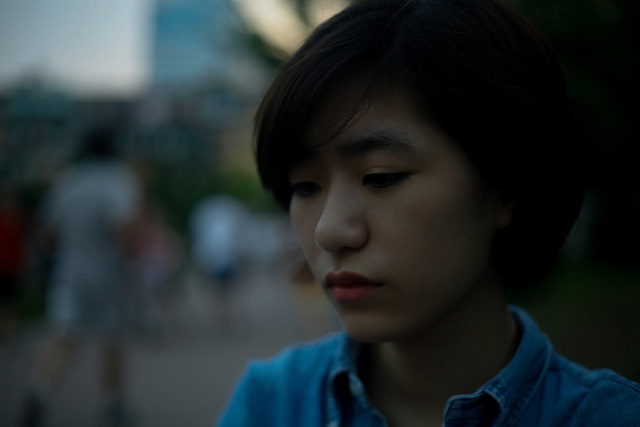

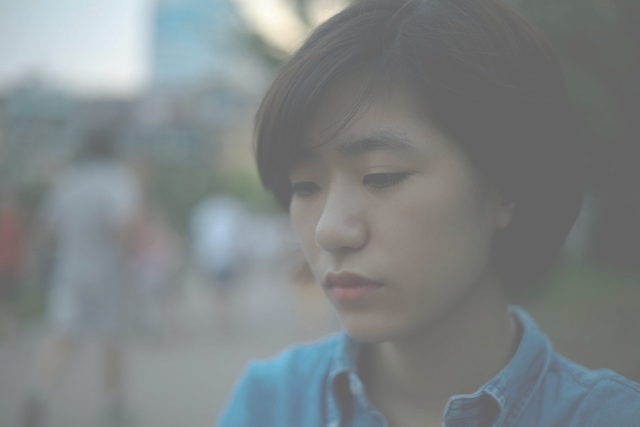

In [0]:
img=cv2.imread('toi.jpg',1)
# Normalize the image, to spread the pixel intensities across 0..255
# This will brighten the image without losing information
output = cv2.normalize(img, None, 100, 255, cv2.NORM_MINMAX)

cv2_imshow(img)
# Save the output
cv2_imshow(output)

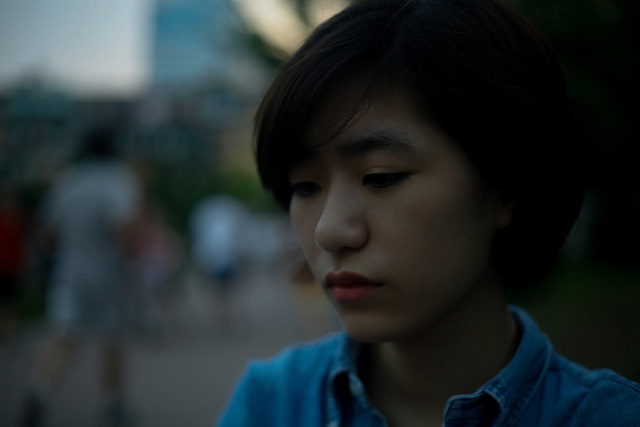

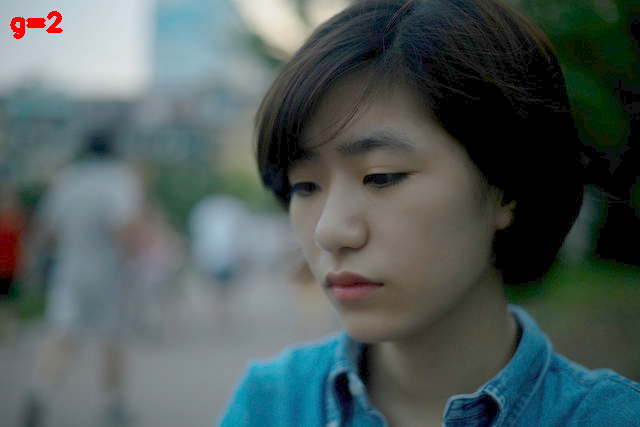

In [0]:
import cv2
import numpy as np

def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

x = 'toi.jpg'  #location of the image
original = cv2.imread(x, 1)
#cv2.imshow('original',original)

gamma = 2                                   # change the value here to get different result
adjusted = adjust_gamma(original, gamma=gamma)
cv2.putText(adjusted, "g={}".format(gamma), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
cv2_imshow(original)
cv2_imshow(adjusted)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Ảnh nền tuyết**

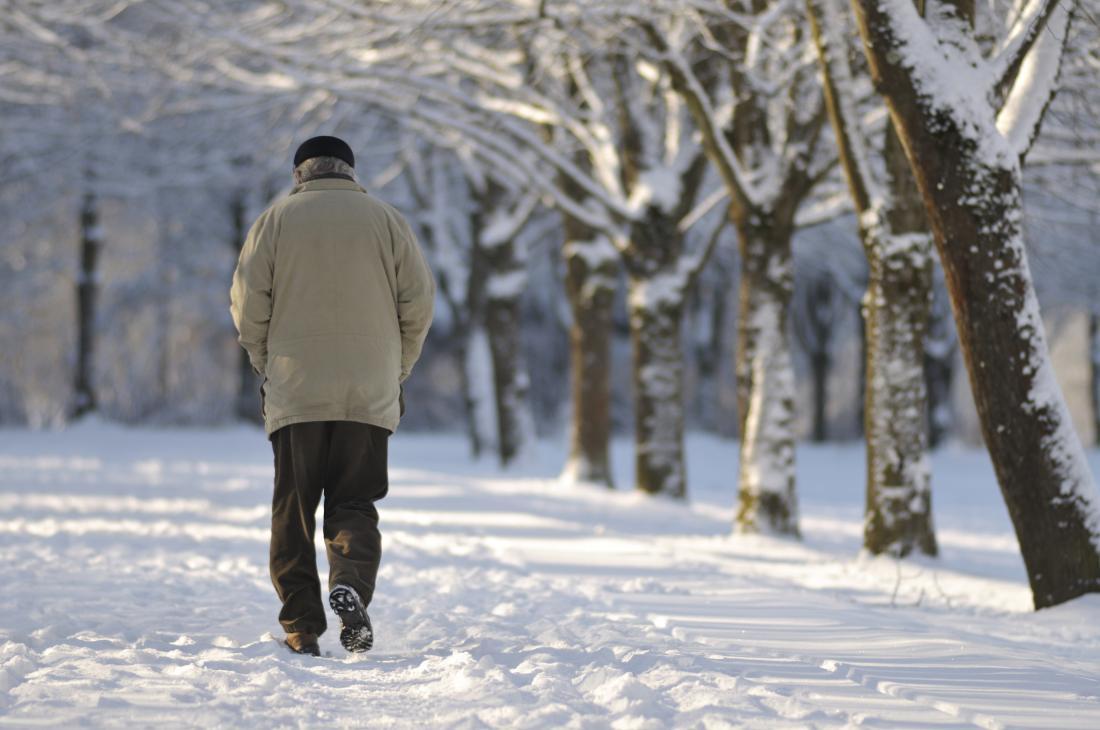

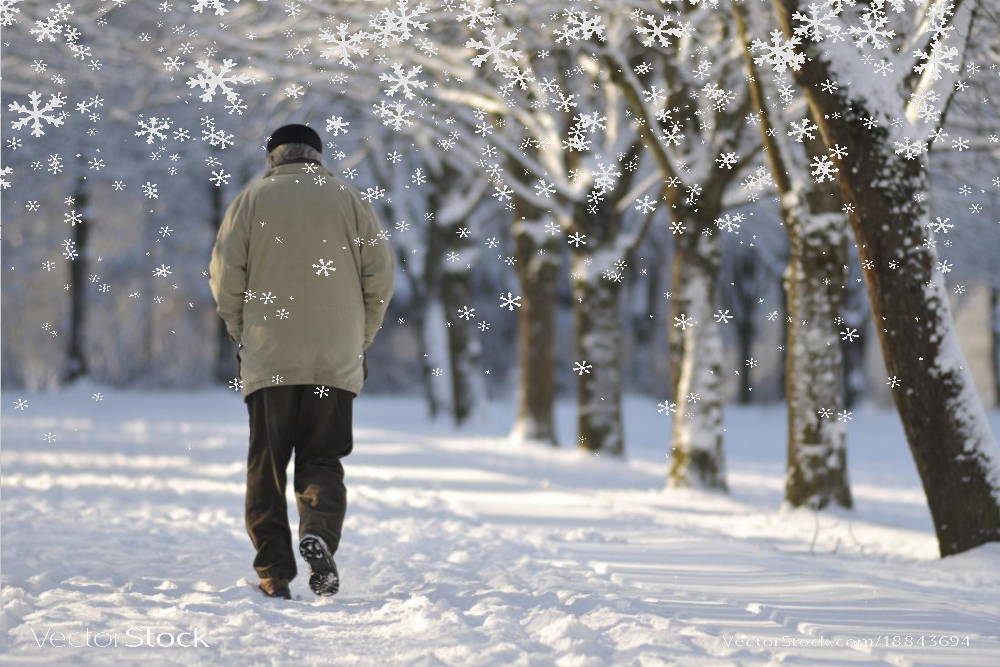

In [0]:
image = cv2.imread('snow.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)



lower_black = np.array([0, 0, 0])     ##[R value, G value, B value]
upper_black = np.array([192, 192, 192])
mask = cv2.inRange(image_copy, lower_black, upper_black)
#plt.imshow(mask, cmap='gray')


masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
#plt.imshow(masked_image)


background_image = cv2.imread('background.jpg')
cv2_imshow( background_image)
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = cv2.resize(background_image, (1000, 667))

crop_background[mask == 0] = [0, 0, 0]
#plt.imshow(crop_background)
plt.show()
final_image = crop_background + masked_image
final_image = cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB)

cv2_imshow( final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


**Làm cong ảnh**

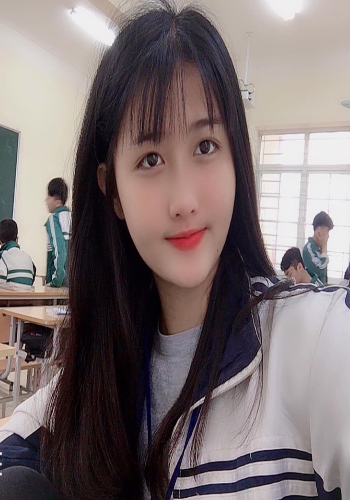

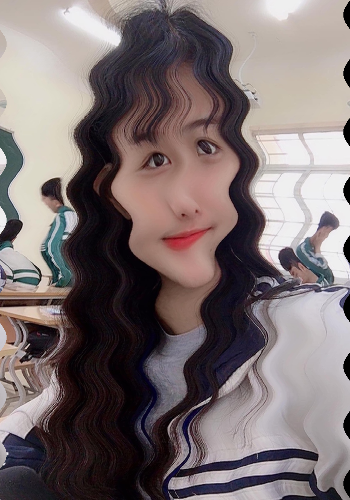

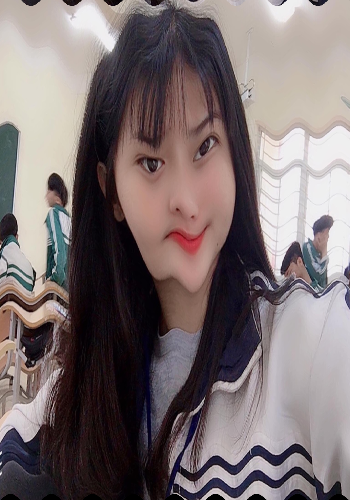

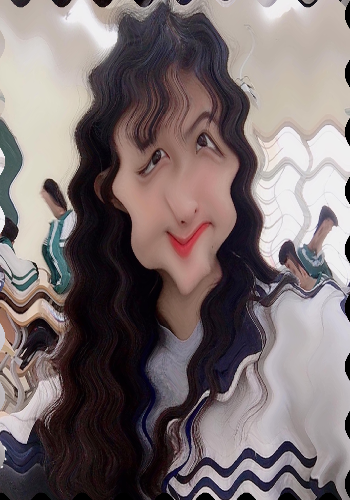

-1

In [0]:
import cv2
import numpy as np
import math
#img = cv2.imread('anhgoc.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('anhgoc.jpg')
rows, cols,_ = img.shape
#####################
# sóng dọc
img_output1 = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = 0
        if j+offset_x < rows:
            img_output1[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output1[i,j] = 0
#cv2_imshow( img)

#####################
# sóng ngang
img_output2 = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output2[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output2[i,j] = 0

#####################
# cả 2 sóng
img_output3 = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output3[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output3[i,j] = 0

#####################

#ghép ảnh

img = cv2.resize(img, (350, 500))
img_output1 = cv2.resize(img_output1, (350, 500))
img_output2 = cv2.resize(img_output2, (350, 500))
img_output3 = cv2.resize(img_output3, (350, 500))
#img_output4 = cv2.resize(img_output4, (350, 500))

'''col_1 = np.vstack([img_output1, img_output2])
col_2 = np.vstack([img_output3, img_output4])
collage = np.hstack([col_1, col_2])'''

cv2_imshow(img)
cv2_imshow(img_output1)
cv2_imshow(img_output2)
cv2_imshow(img_output3)
#cv2.imwrite('anhghep.jpg',collage)
cv2.waitKey()

**Chuyển màu nền**

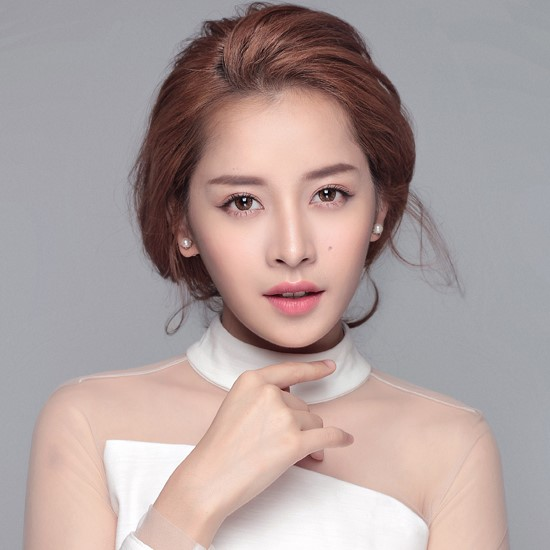

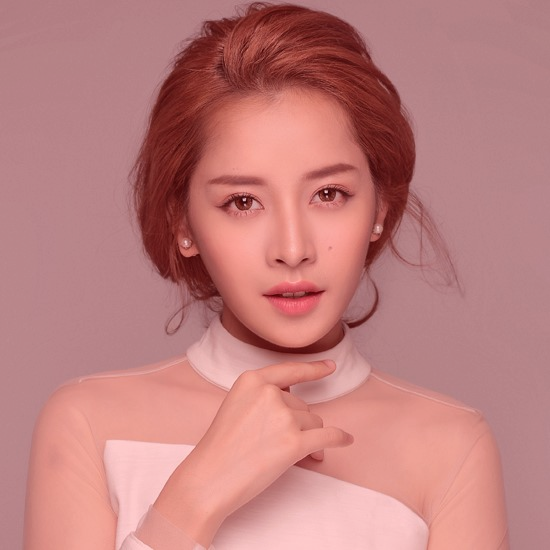

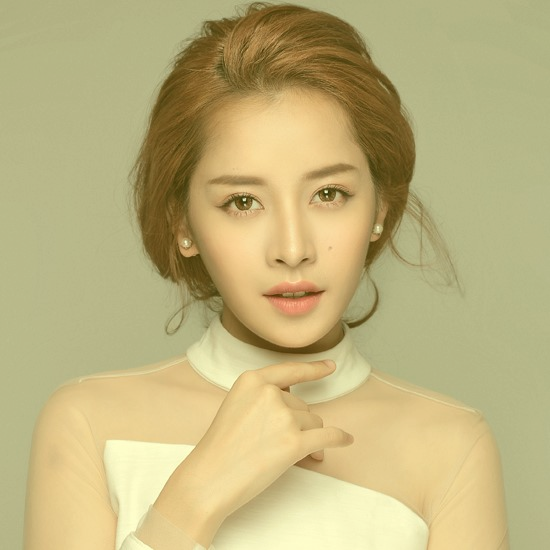

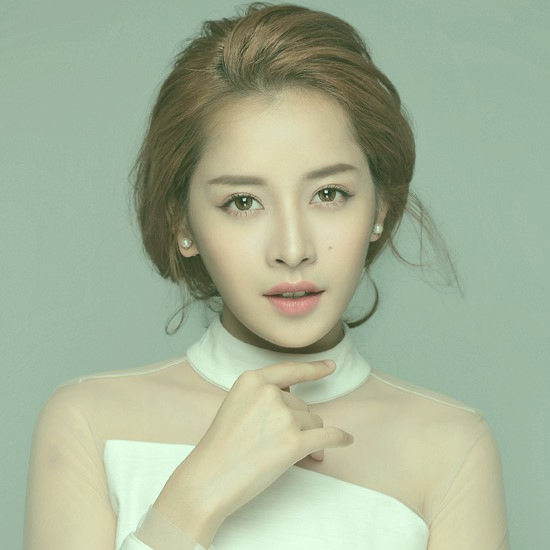

-1

In [0]:
# read the target file
image = 'chipu.jpg'

target_img = cv2.imread(image)
cv2_imshow(target_img )
h,r,_ =target_img.shape
# create an image with a single color (here: red)
red_img  = np.full((h,r,3), (0,0,255), np.uint8)
yel_img  = np.full((h,r,3), (0,255,255), np.uint8)
b_img  = np.full((h,r,3), (127,255,127), np.uint8)
#target_img = cv2.resize(target_img, (red_img.shape[1], red_img.shape[0]))
# add the filter  with a weight factor of 20% to ther taget image
fused_img1  = cv2.addWeighted(target_img, 0.8, red_img, 0.2, 0)
fused_img2  = cv2.addWeighted(target_img, 0.8, yel_img, 0.2, 0)
fused_img3  = cv2.addWeighted(target_img, 0.8, b_img, 0.2, 0)
cv2_imshow(fused_img1)
cv2_imshow(fused_img2)
cv2_imshow(fused_img3)
cv2.waitKey(0)

